In [1]:
%load_ext autoreload
%autoreload 2
%load_ext watermark
%watermark -a "Kenneth Brezinski" -v

Author: Kenneth Brezinski

Python implementation: CPython
Python version       : 3.9.10
IPython version      : 8.0.1



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%watermark --iversions

pandas    : 1.4.1
matplotlib: 3.5.1



In [49]:
#df = pd.read_csv('data/covid19-google.csv')  # google data is big and is the same as CAN data
df = pd.read_csv('data/CAN-health_outcomes.csv')
df.head(3)

,OBJECTID,Province,Abbreviation,DailyTotals,SummaryDate,TotalCases,TotalRecovered,DailyRecovered,TotalDeaths,DailyDeaths,...,TotalICU,DailyICU,TotalVaccinated,DailyVaccinated,TotalDose1,DailyDose1,TotalDose2,DailyDose2,TotalBooster,DailyBooster
0,1,ALBERTA,AB,0,2020/01/25 12:00:00+00,0,0.0,0.0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NWT,NT,0,2020/01/25 12:00:00+00,0,0.0,0.0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,YUKON,YT,0,2020/01/25 12:00:00+00,0,0.0,0.0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
df = df.loc[df['Province'] == 'ONTARIO']
df['date'] = pd.to_datetime(df['SummaryDate'].apply(lambda d: d.split(' ')[0])).rename('date')
df = df.set_index('date')
df.head(3)

,OBJECTID,Province,Abbreviation,DailyTotals,SummaryDate,TotalCases,TotalRecovered,DailyRecovered,TotalDeaths,DailyDeaths,...,TotalICU,DailyICU,TotalVaccinated,DailyVaccinated,TotalDose1,DailyDose1,TotalDose2,DailyDose2,TotalBooster,DailyBooster
date,,,,,,,,,,,,,,,,,,,,,
2021-04-01,7103,ONTARIO,ON,2557,2021/04/01 12:00:00+00,352460,324196.0,1814.0,7389,23.0,...,433.0,37.0,2276313.0,84060.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-02,7118,ONTARIO,ON,0,2021/04/02 12:00:00+00,352460,324196.0,0.0,7389,0.0,...,433.0,0.0,2276313.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-03,7133,ONTARIO,ON,6098,2021/04/03 12:00:00+00,358558,327940.0,3744.0,7428,39.0,...,451.0,18.0,2424063.0,147750.0,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# select date time after first wastewater data entry
df = df.loc[pd.Timestamp('2021-04-01'):, :]

df.isna().sum() ## onlyissing dose information

OBJECTID               0
Province               0
Abbreviation           0
DailyTotals            0
SummaryDate            0
TotalCases             0
TotalRecovered         0
DailyRecovered         0
TotalDeaths            0
DailyDeaths            0
TotalTested            0
DailyTested            0
TotalActive            0
DailyActive            0
TotalHospitalized      0
DailyHospitalized      0
TotalICU               0
DailyICU               0
TotalVaccinated        1
DailyVaccinated        1
TotalDose1            77
DailyDose1            78
TotalDose2            77
DailyDose2            78
TotalBooster         263
DailyBooster         263
dtype: int64

**Interesting COVID fields for:**:

**features**
* TotalCases - divide by population?; early indicator of hospitilizations
* TotalRecovered - divide by population; recovered population?
* TotalActive - divide by population; indicates ongoing infection potential
* TotalVaccinated - divide by population; indicates ongoing infection potential
* TotalDose1/2/Booster - divide by population; indicates ongoing infection potential (missing some data prior to 2021/06)

**targets**
* TotalCases - divide by population?; early indicator of hospitilizations
* TotalHospitilized - lagging indicator of covid cases; better target; depends on provincial healthcare
* TotalICU - lagging indicator of covid cases; worse target; depends on provincial healthcare
* DailyDeaths - lagging indicator of covid cases; worse target; depends on provincial healthcare

<AxesSubplot:xlabel='date'>

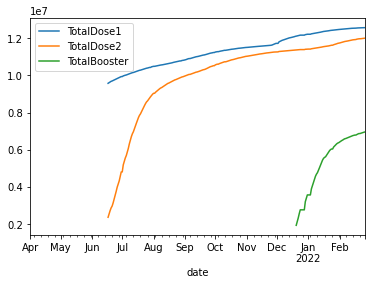

In [44]:
## 
df.loc[:, ['TotalDose1', 'TotalDose2', 'TotalBooster']].plot()